## **Gradient Boosting Classifier**

- Gradient Boosting Classifier is a powerful machine learning algorithm that is used for both regression and classification problems. It is an ensemble learning technique where multiple weak learners, typically decision trees, are combined to create a strong predictive model.

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import time
import matplotlib.pyplot as plt

**Data**

In [2]:
# Path 
file_path = 'data.csv'

# read the data
data = pd.read_csv(file_path)
if 'Unnamed: 0' in data.columns: 
    data.drop('Unnamed: 0', axis=1, inplace=True)

**Model**

In [3]:
# Separate the features and the target variable
X = data.iloc[:, :-1]  # last column is the target
y = data.iloc[:, -1]

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Shapes 
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (39617, 9)
X_test shape: (9905, 9)
y_train shape: (39617,)
y_test shape: (9905,)


In [6]:
# Define the Gradient Boosting model with custom hyperparameters
model = GradientBoostingClassifier(
    n_estimators=100,  # The number of boosting stages to be run
    learning_rate=0.1,  # Learning rate shrinks the contribution of each tree
    max_depth=3,  # Maximum depth of the individual regression estimators
    random_state=42  # Random state for reproducibility
)

In [7]:
# Measure the training time
start_time = time.time()

print("Starting training...")

# Train the model
model.fit(X_train, y_train)

# Measure the end time
end_time = time.time()

print(f"Training completed in {end_time - start_time:.2f} seconds")

Starting training...
Training completed in 278.91 seconds


In [8]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7858657243816255


In [9]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[1905   57   36    4    3    2   15    4    9    1    4    2]
 [  10 1436    0    9    3    5    9   21   43    6    4    1]
 [   5   40  952    1    1    0    0    0    2    1    1    7]
 [   4  137    1  134    9    2   17    5   51   10    6    0]
 [   6  139    4   34   93    3   11   14  109    4    4    0]
 [   7    7    0    1    2  167   84   13    1    3   18    0]
 [   6   50    1    6    9   25  432    7   20    0    7    0]
 [   0   83    0    6    5    1   18  173   82   10   24    0]
 [   5  277    0   27   19    1   27   32  379    4    8    1]
 [   5   44    2    8    3    8   11    2   38  135    6    1]
 [   6   57    1    2   11   12   32    8   32   11  196    0]
 [   1   27    6    1    0    0    3    2    5    3    0 1782]]


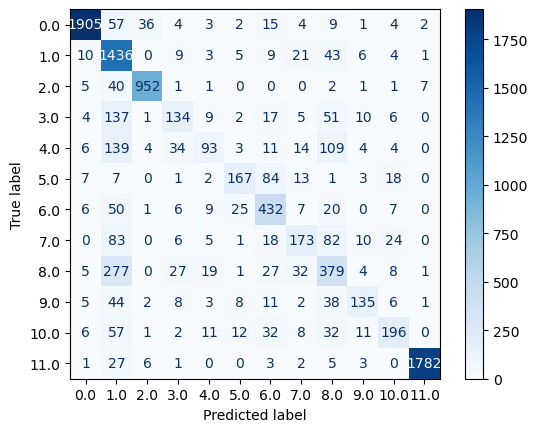

In [10]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

**Save the model**

In [11]:
# Save the model 
import joblib
import os

# Replace with the path to your desired folder
folder_path = "saved_models"
model_filename = "gradient_boosting_classifier.pkl"
full_path = os.path.join(folder_path, model_filename)

# Ensure the directory exists
os.makedirs(folder_path, exist_ok=True)

# Save the trained SVM model
joblib.dump(model, full_path)

print(f"Model saved at {full_path}")

Model saved at saved_models\gradient_boosting_classifier.pkl
